# OSE Dataset Visualization v2 (DataLoader-based)

This notebook provides visualizations and examples for each of the 9 extracted datasets from the OSE project, using the DataLoader class for data loading.

Each dataset has been categorized and includes index columns (`company_name`, `siren`, `siret`) for easy joining and reference.

**Key difference from v1:** This notebook uses the DataLoader API to load datasets from the extracted_datasets folder.


In [1]:
# Configuration
import sys
from pathlib import Path
import os

# Add project root to path so we can import from src
# In Jupyter, __file__ is not available, so we use os.getcwd()
cwd = Path(os.getcwd())

# Check if we're in the project root (has src/ and notebooks/ directories)
if (cwd / 'src').exists() and (cwd / 'notebooks').exists():
    project_root = cwd
# Check if we're in notebooks/ directory
elif (cwd.parent / 'src').exists() and (cwd.parent / 'notebooks').exists():
    project_root = cwd.parent
# Fallback: try relative path from notebooks/
else:
    project_root = Path('..').resolve()

sys.path.insert(0, str(project_root))
print(f"Project root: {project_root}")
print(f"src exists: {(project_root / 'src').exists()}")

# Configuration
SEED = 42

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import DataLoader
from src.ose_core.data import DataLoader

# Initialize DataLoader
loader = DataLoader()

# Get paths using DataLoader
DATA_DIR = loader.get_data_dir()
EXTRACTED_DATASETS_DIR = loader.get_extracted_datasets_dir()
RAW_JSON_PATH = loader.get_raw_json_path()

# Set random seeds for reproducibility
np.random.seed(SEED)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Configuration loaded successfully!")
print(f"Data directory: {DATA_DIR}")
print(f"Extracted datasets directory: {EXTRACTED_DATASETS_DIR}")
if RAW_JSON_PATH:
    print(f"Raw JSON path: {RAW_JSON_PATH}")
else:
    print("Raw JSON path: Not found")


Project root: /Users/jlb/Documents/Python Course/git_OSE/ose-main
src exists: True
Configuration loaded successfully!
Data directory: /Users/jlb/Documents/Python Course/git_OSE/ose-main/src/ose_core/data
Extracted datasets directory: /Users/jlb/Documents/Python Course/git_OSE/ose-main/src/ose_core/data/extracted_datasets
Raw JSON path: /Users/jlb/Documents/Python Course/git_OSE/ose-main/src/ose_core/data/search_24721_2025_11_24.json


In [2]:
# Load all datasets using DataLoader
data = loader.load_all_datasets()

print("\nData loading complete!")
print(f"Loaded {len(data)} datasets:")
for name in sorted(data.keys()):
    print(f"  - {name}: {data[name].shape}")



Data loading complete!
Loaded 9 datasets:
  - 01_company_basic_info: (375, 10)
  - 02_financial_data: (375, 112)
  - 03_workforce_data: (375, 7)
  - 04_company_structure: (375, 9)
  - 05_classification_flags: (375, 15)
  - 06_contact_metrics: (375, 9)
  - 07_kpi_data: (3779, 28)
  - 08_signals: (2133, 12)
  - 09_articles: (1180, 13)


In [3]:
# Test: Verify configuration and paths
print("=== Configuration Test ===")
print(f"✓ Project root: {project_root}")
print(f"✓ src directory exists: {(project_root / 'src').exists()}")
print(f"✓ Data directory: {DATA_DIR}")
print(f"✓ Extracted datasets directory: {EXTRACTED_DATASETS_DIR}")
if RAW_JSON_PATH:
    print(f"✓ Raw JSON path exists: {RAW_JSON_PATH.exists()}")
else:
    print(f"⚠ Raw JSON path: Not found (optional)")
print(f"✓ Seed set to: {SEED}")

# Verify import works
try:
    from src.ose_core.data import DataLoader
    test_loader = DataLoader()
    test_data = test_loader.load_all_datasets()
    print(f"✓ DataLoader import successful")
    print(f"✓ Successfully loaded {len(test_data)} datasets")
except ImportError as e:
    print(f"✗ DataLoader import failed: {e}")
except Exception as e:
    print(f"✗ Data loading failed: {e}")

print("\nConfiguration test complete!")


=== Configuration Test ===
✓ Project root: /Users/jlb/Documents/Python Course/git_OSE/ose-main
✓ src directory exists: True
✓ Data directory: /Users/jlb/Documents/Python Course/git_OSE/ose-main/src/ose_core/data
✓ Extracted datasets directory: /Users/jlb/Documents/Python Course/git_OSE/ose-main/src/ose_core/data/extracted_datasets
✓ Raw JSON path exists: True
✓ Seed set to: 42
✓ DataLoader import successful
✓ Successfully loaded 9 datasets

Configuration test complete!


In [4]:
# Test: Verify extraction results
print("=== Extraction Test ===")

# Check all 9 datasets exist
expected_datasets = [
    '01_company_basic_info',
    '02_financial_data',
    '03_workforce_data',
    '04_company_structure',
    '05_classification_flags',
    '06_contact_metrics',
    '07_kpi_data',
    '08_signals',
    '09_articles'
]

print(f"Expected datasets: {len(expected_datasets)}")
print(f"Extracted datasets: {len(data)}")

# Verify all datasets are present
missing = [ds for ds in expected_datasets if ds not in data]
if missing:
    print(f"✗ Missing datasets: {missing}")
else:
    print("✓ All expected datasets present")

# Verify each dataset has data
print("\nDataset validation:")
for name in expected_datasets:
    df = data[name]
    if df.empty:
        print(f"  ⚠ {name}: Empty DataFrame")
    else:
        print(f"  ✓ {name}: {df.shape[0]} rows, {df.shape[1]} columns")
        # Check for required index columns
        if 'siren' in df.columns:
            siren_count = df['siren'].notna().sum()
            print(f"    - SIREN: {siren_count} non-null values")
        if 'siret' in df.columns:
            siret_count = df['siret'].notna().sum()
            print(f"    - SIRET: {siret_count} non-null values")

# Verify files exist in extracted datasets directory
print(f"\nExtracted datasets directory check: {EXTRACTED_DATASETS_DIR}")
if EXTRACTED_DATASETS_DIR.exists():
    csv_files = list(EXTRACTED_DATASETS_DIR.glob('*.csv'))
    json_files = list(EXTRACTED_DATASETS_DIR.glob('*.json'))
    print(f"  ✓ CSV files found: {len(csv_files)}")
    print(f"  ✓ JSON files found: {len(json_files)}")
else:
    print(f"  ⚠ Extracted datasets directory does not exist")

print("\nData loading test complete!")


=== Extraction Test ===
Expected datasets: 9
Extracted datasets: 9
✓ All expected datasets present

Dataset validation:
  ✓ 01_company_basic_info: 375 rows, 10 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 02_financial_data: 375 rows, 112 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 03_workforce_data: 375 rows, 7 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 04_company_structure: 375 rows, 9 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 05_classification_flags: 375 rows, 15 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 06_contact_metrics: 375 rows, 9 columns
    - SIREN: 375 non-null values
    - SIRET: 351 non-null values
  ✓ 07_kpi_data: 3779 rows, 28 columns
    - SIREN: 3779 non-null values
    - SIRET: 3564 non-null values
  ✓ 08_signals: 2133 rows, 12 columns
    - SIREN: 2133 non-null values
    - SIRET: 2133 non-null va

## 1. Company Basic Info

This dataset contains basic company identification and information including:
- Company names and variations
- SIREN and SIRET identifiers
- Department codes
- Activity descriptions
- Processing timestamps

**Use case:** Primary reference dataset for company identification.


In [5]:
# Load company basic info from loaded datasets
df_basic = data['01_company_basic_info']

print(f"Dataset shape: {df_basic.shape}")
print(f"\nColumns: {list(df_basic.columns)}")
display(df_basic.head(10))


Dataset shape: (375, 10)

Columns: ['company_name', 'siren', 'siret', 'departement', 'resume_activite', 'raison_sociale_keyword', 'raison_sociale', 'last_modified', 'processedAt', 'updatedAt']


,company_name,siren,siret,departement,resume_activite,raison_sociale_keyword,raison_sociale,last_modified,processedAt,updatedAt
0,PROCONI,132066,NaN,00,fabrication de plats cuisinés frais pour la gr...,PROCONI,PROCONI,2023-04-07T20:37:50,1763018431,1762042439
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,21,Spécialisée en pains d'épices et pâtisseries a...,PAIN D'EPICES MULOT ET PETITJEAN,PAIN D'EPICES MULOT ET PETITJEAN,2025-05-05T07:44:39,1761068226,1763052487
2,JULIEN MACK,16450298,1.645030e+12,92,Préparation industrielle de produits à base de...,JULIEN MACK,JULIEN MACK,2025-06-27T08:59:06,1761097489,1763052488
3,OROC BAT,46580031,4.658003e+12,64,"fabrication de conserves, charcuterie et jambo...",OROC BAT,OROC BAT,2025-05-05T04:38:43,1763401032,1763052541
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,38,fabrication de farines,MINOTERIE DU TRIEVES CORREARD ET FILS,MINOTERIE DU TRIEVES CORREARD ET FILS,2025-06-27T15:52:42,1763438582,1763943214
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,13,Fabrication transformation achat et vente de t...,MAISON CANTINI FLANDIN,MAISON CANTINI FLANDIN,2025-05-05T05:54:55,1761105532,1763052557
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,45,fabricant de volailles et produits transformés...,AUVRAY-AUXY EN GATINAIS,AUVRAY-AUXY EN GATINAIS,2025-05-27T08:34:13,1761118573,1763052587
7,BIRABEN,96780838,9.678084e+12,64,fabrication de plats préparés,BIRABEN,BIRABEN,2025-05-05T08:04:16,1762592602,1763052593
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,976,fabrication de lait liquide et de produits lai...,LAITERIE DE MAYOTTE,LAITERIE DE MAYOTTE,2025-09-25T02:24:42,1760928797,1763052595
9,SALAISONS CHAMBADE,300700119,3.007001e+13,71,"fabricant de produits à base de viande, charcu...",SALAISONS CHAMBADE,SALAISONS CHAMBADE,2025-05-20T18:28:55,1760538135,1763052889


In [6]:
# Summary statistics
print(f"\nSummary:")
print(f"- Total companies: {len(df_basic)}")
print(f"- Companies with SIRET: {df_basic['siret'].notna().sum()} ({df_basic['siret'].notna().sum()/len(df_basic)*100:.1f}%)")
print(f"- Companies with SIREN: {df_basic['siren'].notna().sum()} ({df_basic['siren'].notna().sum()/len(df_basic)*100:.1f}%)")

print(f"- Unique departments: {df_basic['departement'].nunique()}")
print(f"- Companies with activity description: {df_basic['resume_activite'].notna().sum()}")



Summary:
- Total companies: 375
- Companies with SIRET: 351 (93.6%)
- Companies with SIREN: 375 (100.0%)
- Unique departments: 87
- Companies with activity description: 374


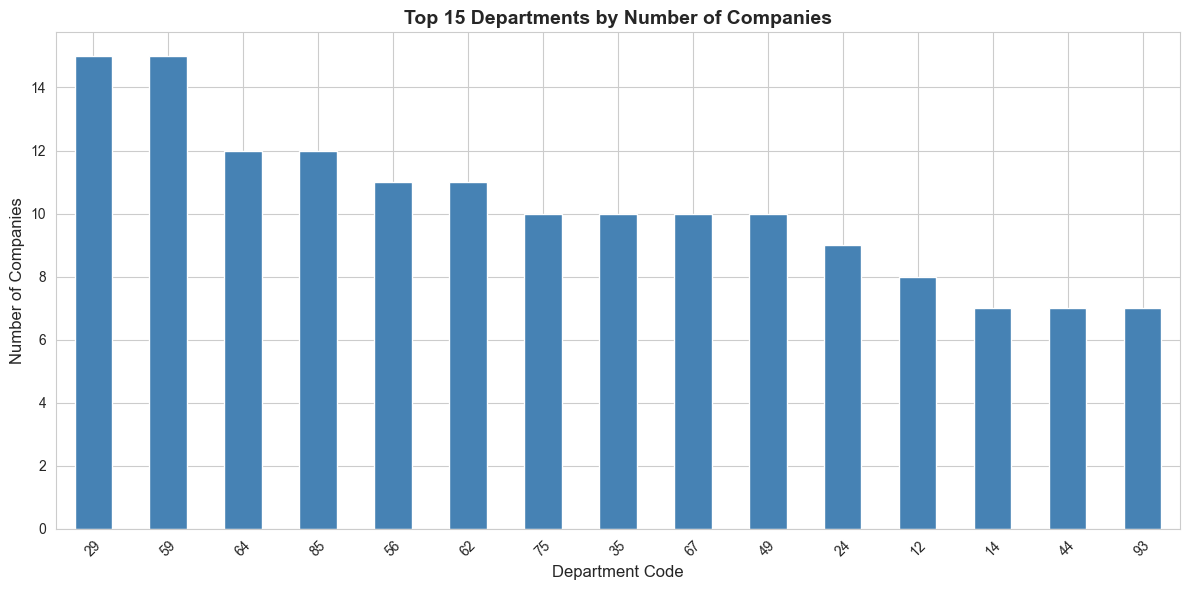


Top 5 departments:
departement
29    15
59    15
64    12
85    12
56    11
Name: count, dtype: int64


In [7]:
# Visualize department distribution
if df_basic['departement'].notna().any():
    dept_counts = df_basic['departement'].value_counts().head(15) # select top number of departement

    plt.figure(figsize=(12, 6))
    dept_counts.plot(kind='bar', color='steelblue')
    plt.title('Top 15 Departments by Number of Companies', fontsize=14, fontweight='bold')
    plt.xlabel('Department Code', fontsize=12)
    plt.ylabel('Number of Companies', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nTop 5 departments:")
    print(dept_counts.head())


## 2. Financial Data

This dataset contains financial metrics including:
- Consolidated revenue (`caConsolide`)
- Group revenue (`caGroupe`)
- Operating results (`resultatExploitation`)
- Yearly KPI financial metrics (2014-2025)

**Use case:** Financial analysis, revenue trends, profitability assessment.


In [8]:
# Load financial data from loaded datasets
df_financial = data['02_financial_data']
print(f" Original Shape:{df_financial.shape}")
df_financial.head(10)


 Original Shape:(375, 112)


,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
0,PROCONI,132066,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,0.0,0.0,76546.0,0.0,120000.0,1.0772,6729652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JULIEN MACK,16450298,1.645030e+12,0.0,0.0,670860.0,0.0,257600.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OROC BAT,46580031,4.658003e+12,0.0,0.0,140333.0,0.0,350000.0,NaN,5028967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,0.0,0.0,473736.0,0.0,3000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,0.0,0.0,52265.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BIRABEN,96780838,9.678084e+12,0.0,0.0,-64962.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,NaN,NaN,1588313.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,3.007001e+13,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_financial.tail(20)


,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
355,MARTIN DOW HEALTHCARE,811831163,8.118312e+13,0.0,0.0,-2146867.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,EPISENS BY INVIVO,818893281,8.188933e+13,NaN,NaN,-1513406.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,VAYGA SAS,820918407,8.209184e+13,0.0,0.0,128274.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,TROPICANA,828787291,8.287873e+13,0.0,0.0,-60636.0,0.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,DIABOLO,829983600,8.299836e+13,0.0,0.0,387667.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,EVS DECOUPE,838412625,NaN,NaN,NaN,NaN,NaN,20000.0,1.104587,5118566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,SOCIETE DES VOLAILLES DE PLOURAY,840071310,8.400713e+13,0.0,0.0,-80276.0,0.0,1500000.0,1.282221,8588960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,AUVERGNE BOULANGERE ET PATISSIERE,861200210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,DISTRIPORC SARL,871201190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,MAISON COSSARD S.A.S,872800651,8.728007e+13,0.0,0.0,979188.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Dataset shape: {df_financial.shape}")
print(f"\nMain financial columns:")


Dataset shape: (375, 112)

Main financial columns:


In [11]:
#SELECTING COLUMN
index_cols = ['company_name', 'siren', 'siret']
main_cols = ['caConsolide', 'caGroupe', 'resultatExploitation','dateConsolide']
display(df_financial[index_cols+main_cols].head(10))


,company_name,siren,siret,caConsolide,caGroupe,resultatExploitation,dateConsolide
0,PROCONI,132066,NaN,0.0,0.0,0.0,0.0
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,0.0,0.0,76546.0,0.0
2,JULIEN MACK,16450298,1.645030e+12,0.0,0.0,670860.0,0.0
3,OROC BAT,46580031,4.658003e+12,0.0,0.0,140333.0,0.0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,0.0,0.0,473736.0,0.0
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,0.0,0.0,52265.0,0.0
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,0.0,0.0,0.0,0.0
7,BIRABEN,96780838,9.678084e+12,0.0,0.0,-64962.0,0.0
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,NaN,NaN,1588313.0,NaN
9,SALAISONS CHAMBADE,300700119,3.007001e+13,0.0,0.0,0.0,0.0


In [12]:
# Filter out zeros and negative values for better visualization
# Convert to numeric first (handles string values)
ca_consolide = pd.to_numeric(df_financial['caConsolide'], errors='coerce').replace(0, np.nan).dropna()
ca_groupe = pd.to_numeric(df_financial['caGroupe'], errors='coerce').replace(0, np.nan).dropna()


In [13]:
print(f"Ca_consolide:\n{ca_consolide.head()}")
print(f"Ca_groupe:\n{ca_groupe.head()}")


Ca_consolide:
79     15000000.0
132    15000000.0
134    19600000.0
177    20000000.0
250    12000000.0
Name: caConsolide, dtype: float64
Ca_groupe:
79     15000000.0
132    15000000.0
134    19600000.0
177    20000000.0
250    12000000.0
Name: caGroupe, dtype: float64


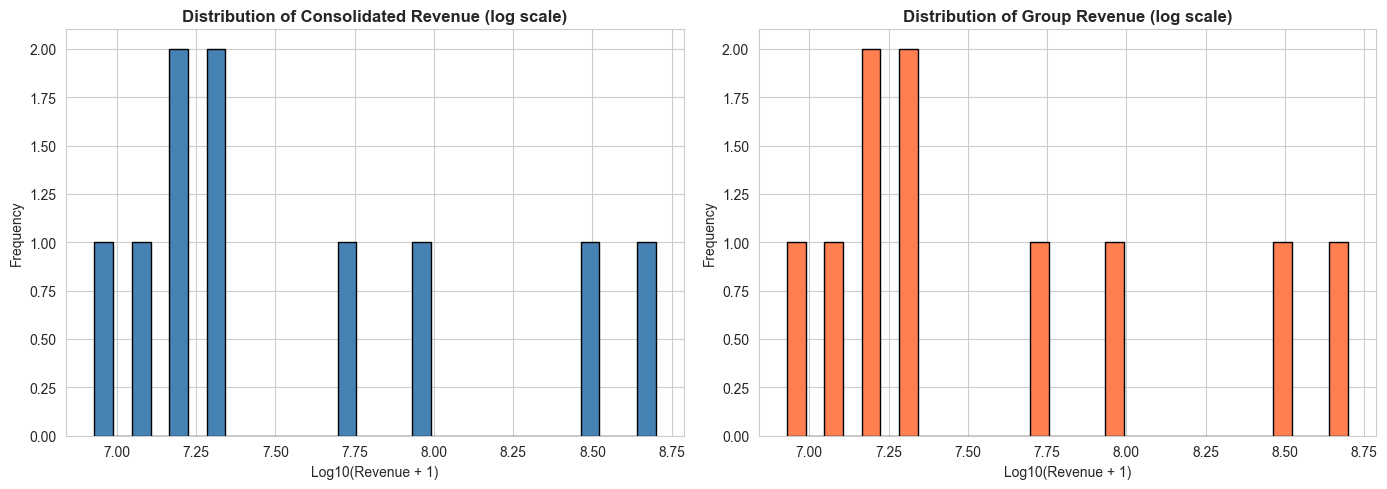

In [14]:
# Visualize financial metrics distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


if len(ca_consolide) > 0:
    axes[0].hist(np.log10(ca_consolide + 1), bins=30, color='steelblue', edgecolor='black')
    axes[0].set_title('Distribution of Consolidated Revenue (log scale)', fontweight='bold')
    axes[0].set_xlabel('Log10(Revenue + 1)')
    axes[0].set_ylabel('Frequency')

if len(ca_groupe) > 0:
    axes[1].hist(np.log10(ca_groupe + 1), bins=30, color='coral', edgecolor='black')
    axes[1].set_title('Distribution of Group Revenue (log scale)', fontweight='bold')
    axes[1].set_xlabel('Log10(Revenue + 1)')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
# Summary statistics
print("\nFinancial Summary:")
print(f"Companies with consolidated revenue data: {ca_consolide.notna().sum()}")
print(f"Companies with group revenue data: {ca_groupe.notna().sum()}")

if len(ca_consolide) > 0:
    print(f"\nConsolidated Revenue:")
    print(f"  Mean: {ca_consolide.mean():,.0f}")
    print(f"  Median: {ca_consolide.median():,.0f}")
    print(f"  Max: {ca_consolide.max():,.0f}")



Financial Summary:
Companies with consolidated revenue data: 10
Companies with group revenue data: 10

Consolidated Revenue:
  Mean: 103,210,000
  Median: 19,800,000
  Max: 500,000,000


In [16]:
# Create a copy of financial dataframe with only KPI columns
# Drop main financial columns, keeping index columns and KPI columns
df_kpi = df_financial.drop(columns=main_cols).copy()
df_kpi.head(10)


,company_name,siren,siret,kpi_2025_capital_social,kpi_2025_evolution_ca,kpi_2023_ca_france,kpi_2023_ca_bilan,kpi_2023_resultat_exploitation,kpi_2023_capital_social,kpi_2023_resultat_bilan,...,kpi_2017_ca_consolide,kpi_2016_ca_consolide,kpi_2016_resultat_net_consolide,kpi_2023_ca_consolide,kpi_2023_resultat_net_consolide,kpi_2022_ca_consolide,kpi_2022_resultat_net_consolide,kpi_2021_ca_consolide,kpi_2021_resultat_net_consolide,kpi_2017_resultat_net_consolide
0,PROCONI,132066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,120000.0,1.0772,6729652.0,6729652.0,76546.0,120000.0,660408.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JULIEN MACK,16450298,1.645030e+12,257600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OROC BAT,46580031,4.658003e+12,350000.0,NaN,5028967.0,5062444.0,140333.0,350000.0,209105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BIRABEN,96780838,9.678084e+12,NaN,NaN,NaN,7035151.0,NaN,NaN,139951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,NaN,NaN,NaN,7949654.0,NaN,NaN,1006387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,3.007001e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


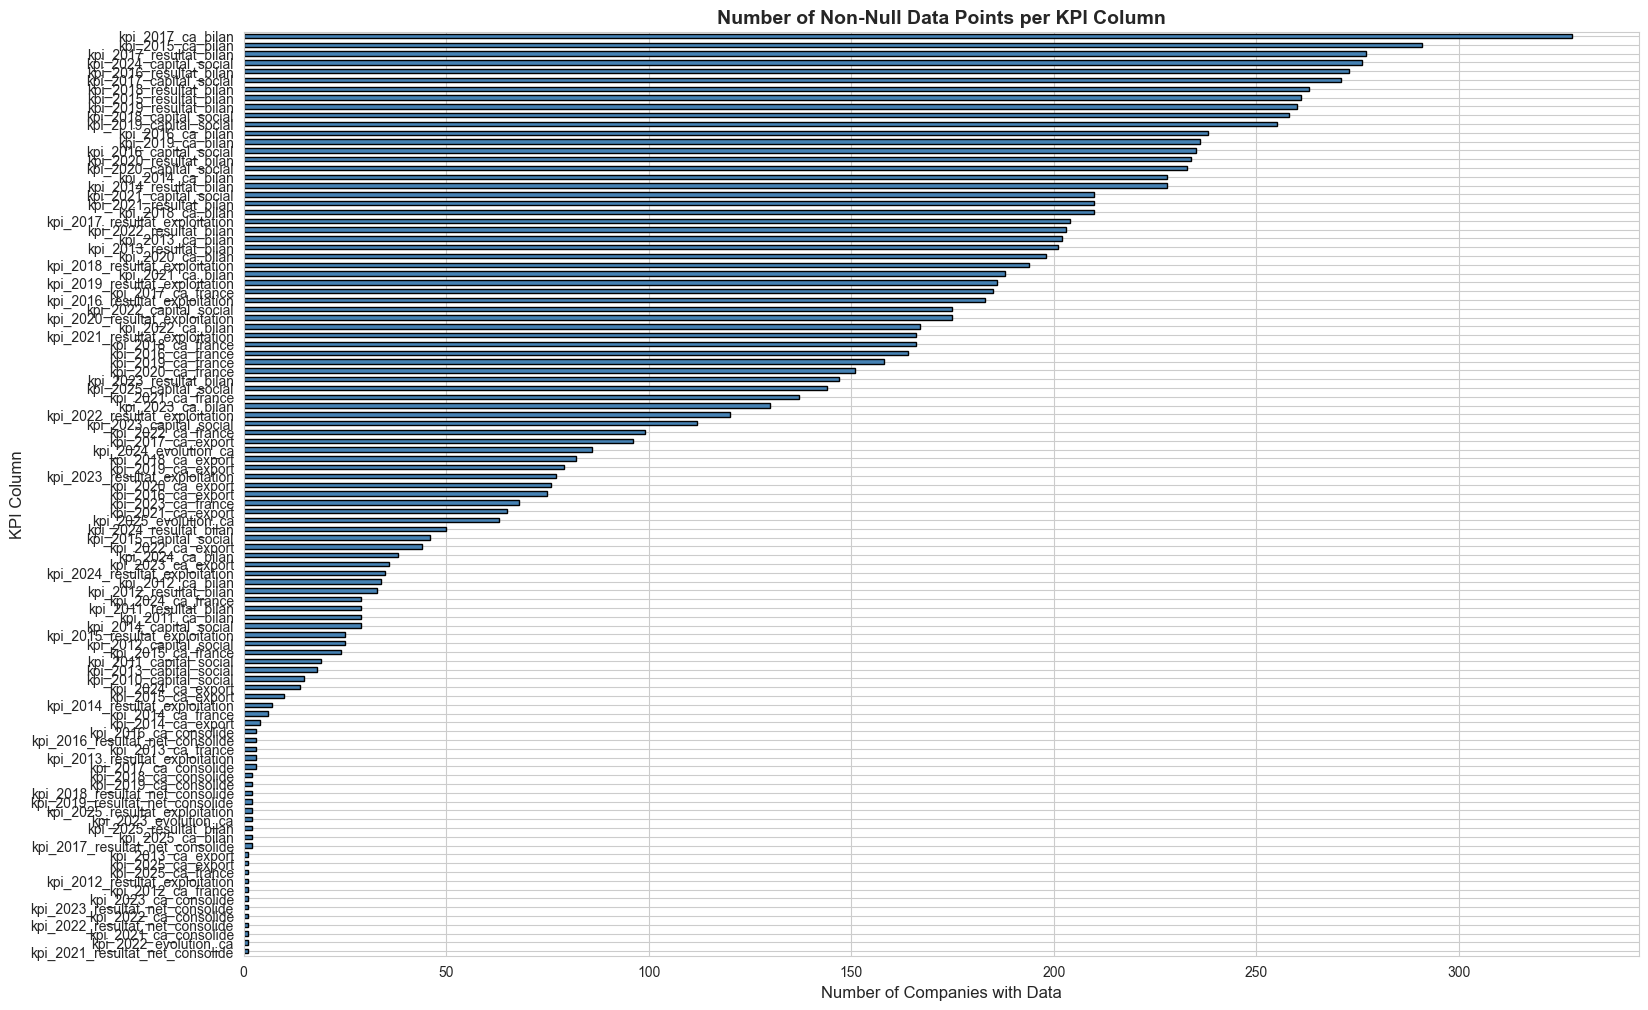

In [17]:
# Plot the number of non-null data points in each KPI column
kpi_data_counts = df_kpi.drop(columns=index_cols).notna().sum().sort_values(ascending=True)

plt.figure(figsize=(18, 12))
kpi_data_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Number of Non-Null Data Points per KPI Column', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies with Data', fontsize=12)
plt.ylabel('KPI Column', fontsize=12)
# plt.tight_layout()
plt.show()


In [18]:
#Summary statistics of KPI data coverage
print(f"\nKPI Data Coverage Summary:")
print(f"Total KPI columns: {len(kpi_data_counts)}")
print(f"Columns with data: {(kpi_data_counts > 0).sum()}")
print(f"Columns with full data: {(kpi_data_counts == len(df_kpi)).sum()}")
print(f"\nTop 10 KPI columns by data coverage:")
print(kpi_data_counts.head(10))
print(f"\nBottom 10 KPI columns by data coverage:")
print(kpi_data_counts.tail(10))



KPI Data Coverage Summary:
Total KPI columns: 105
Columns with data: 105
Columns with full data: 0

Top 10 KPI columns by data coverage:
kpi_2021_resultat_net_consolide    1
kpi_2022_evolution_ca              1
kpi_2021_ca_consolide              1
kpi_2022_resultat_net_consolide    1
kpi_2022_ca_consolide              1
kpi_2023_resultat_net_consolide    1
kpi_2023_ca_consolide              1
kpi_2012_ca_france                 1
kpi_2012_resultat_exploitation     1
kpi_2025_ca_france                 1
dtype: int64

Bottom 10 KPI columns by data coverage:
kpi_2018_capital_social    258
kpi_2019_resultat_bilan    260
kpi_2015_resultat_bilan    261
kpi_2018_resultat_bilan    263
kpi_2017_capital_social    271
kpi_2016_resultat_bilan    273
kpi_2024_capital_social    276
kpi_2017_resultat_bilan    277
kpi_2015_ca_bilan          291
kpi_2017_ca_bilan          328
dtype: int64


## 3. Workforce Data

This dataset contains employee and workforce information:
- `effectif`: Workforce
- `effectifConsolide`: Consolidated workforce
- `effectifEstime`: Estimated workforce
- `effectifGroupe`: Group workforce

**Use case:** Company size analysis, workforce trends, employee count comparisons.


In [19]:
# Load workforce data from loaded datasets
df_workforce = data['03_workforce_data']
df_workforce.head(20)


,company_name,siren,siret,effectif,effectifConsolide,effectifEstime,effectifGroupe
0,PROCONI,132066,NaN,0.0,0.0,75.0,0.0
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,35.0,0.0,0.0,0.0
2,JULIEN MACK,16450298,1.645030e+12,35.0,0.0,0.0,0.0
3,OROC BAT,46580031,4.658003e+12,21.0,0.0,0.0,0.0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,23.0,0.0,30.0,0.0
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,35.0,0.0,0.0,0.0
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,35.0,0.0,0.0,0.0
7,BIRABEN,96780838,9.678084e+12,35.0,0.0,40.0,0.0
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,46.0,NaN,NaN,NaN
9,SALAISONS CHAMBADE,300700119,3.007001e+13,35.0,0.0,0.0,0.0


In [20]:
# Summary
print(f"Dataset shape: {df_workforce.shape}")
print(f"\nColumns: {list(df_workforce.columns)}")


print(f"\nWorkforce Summary:")
for col in ['effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']:
    # Convert to numeric first (handles string values)
    col_numeric = pd.to_numeric(df_workforce[col], errors='coerce')
    non_zero = (col_numeric > 0).sum()
    if non_zero > 0:
        mean_val = col_numeric[col_numeric > 0].mean()
        print(f"{col}: {non_zero} companies with data, mean: {mean_val:.1f}")


Dataset shape: (375, 7)

Columns: ['company_name', 'siren', 'siret', 'effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']

Workforce Summary:
effectif: 351 companies with data, mean: 48.4
effectifConsolide: 10 companies with data, mean: 397.4
effectifEstime: 112 companies with data, mean: 52.8
effectifGroupe: 10 companies with data, mean: 397.4


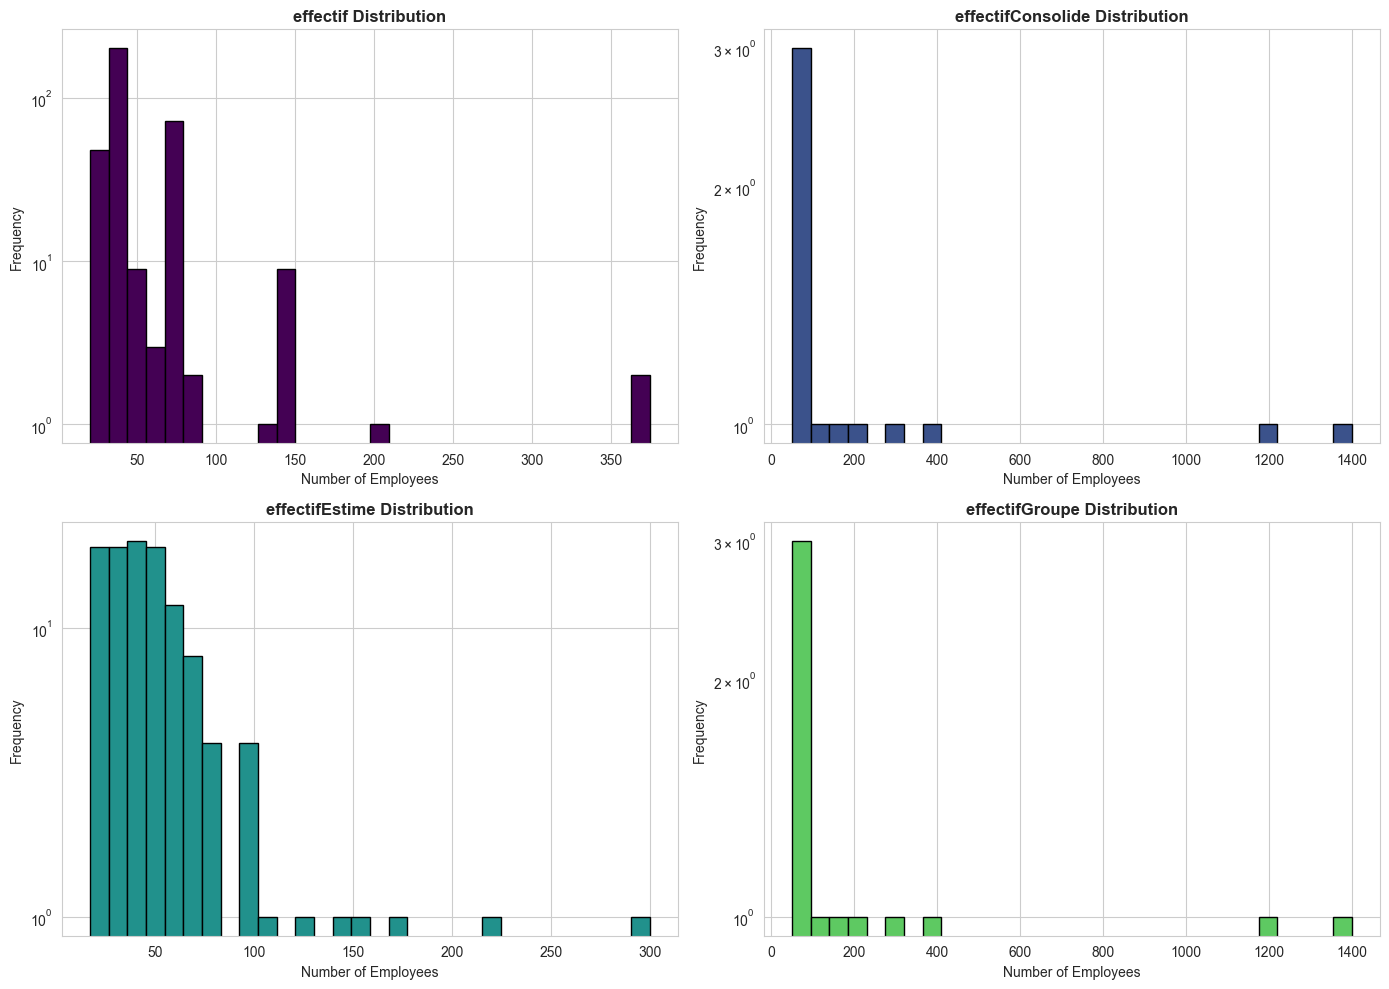

In [21]:
# Visualize workforce distribution
workforce_cols = ['effectif', 'effectifConsolide', 'effectifEstime', 'effectifGroupe']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(workforce_cols):
    # Convert to numeric first (handles string values)
    col_numeric = pd.to_numeric(df_workforce[col], errors='coerce')
    data_col = col_numeric[col_numeric > 0]
    if len(data_col) > 0:
        axes[idx].hist(data_col, bins=30, color=plt.cm.viridis(idx/len(workforce_cols)), edgecolor='black')
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_xlabel('Number of Employees')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_yscale('log')

plt.tight_layout()
plt.show()


## 4. Company Structure

This dataset contains organizational structure information:
- Number of direct subsidiaries
- Number of secondary establishments
- Number of brands
- Group ownership flags

**Use case:** Understanding company complexity, group structures, organizational analysis.


In [22]:
# Load company structure data from loaded datasets
df_structure = data['04_company_structure']

print(f"Dataset shape: {df_structure.shape}")
display(df_structure.head(10))


Dataset shape: (375, 9)


,company_name,siren,siret,nbFilialesDirectes,nbEtabSecondaire,nbMarques,hasGroupOwner,appartient_groupe,nombre_etablissements_secondaires_inactifs
0,PROCONI,132066,NaN,0.0,0.0,0.0,False,False,0
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,6.0,4.0,14.0,False,False,3
2,JULIEN MACK,16450298,1.645030e+12,1.0,0.0,4.0,False,False,2
3,OROC BAT,46580031,4.658003e+12,0.0,0.0,3.0,False,False,0
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,0.0,0.0,0.0,False,False,0
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,0.0,0.0,0.0,False,False,4
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,0.0,0.0,0.0,False,False,0
7,BIRABEN,96780838,9.678084e+12,0.0,0.0,0.0,False,False,0
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,NaN,NaN,NaN,False,False,0
9,SALAISONS CHAMBADE,300700119,3.007001e+13,0.0,0.0,0.0,False,False,2


In [23]:
# Summary
print(f"\nStructure Summary:")
# Convert to numeric first (handles string values)
nb_filiales = pd.to_numeric(df_structure['nbFilialesDirectes'], errors='coerce')
nb_etab = pd.to_numeric(df_structure['nbEtabSecondaire'], errors='coerce')
nb_marques = pd.to_numeric(df_structure['nbMarques'], errors='coerce')
print(f"Companies with subsidiaries: {(nb_filiales > 0).sum()}")
print(f"Companies with secondary establishments: {(nb_etab > 0).sum()}")
print(f"Companies with brands: {(nb_marques > 0).sum()}")
print(f"Companies with group owner: {df_structure['hasGroupOwner'].sum()}")
print(f"Companies belonging to group: {df_structure['appartient_groupe'].sum()}")



Structure Summary:
Companies with subsidiaries: 15
Companies with secondary establishments: 86
Companies with brands: 111
Companies with group owner: 44
Companies belonging to group: 49


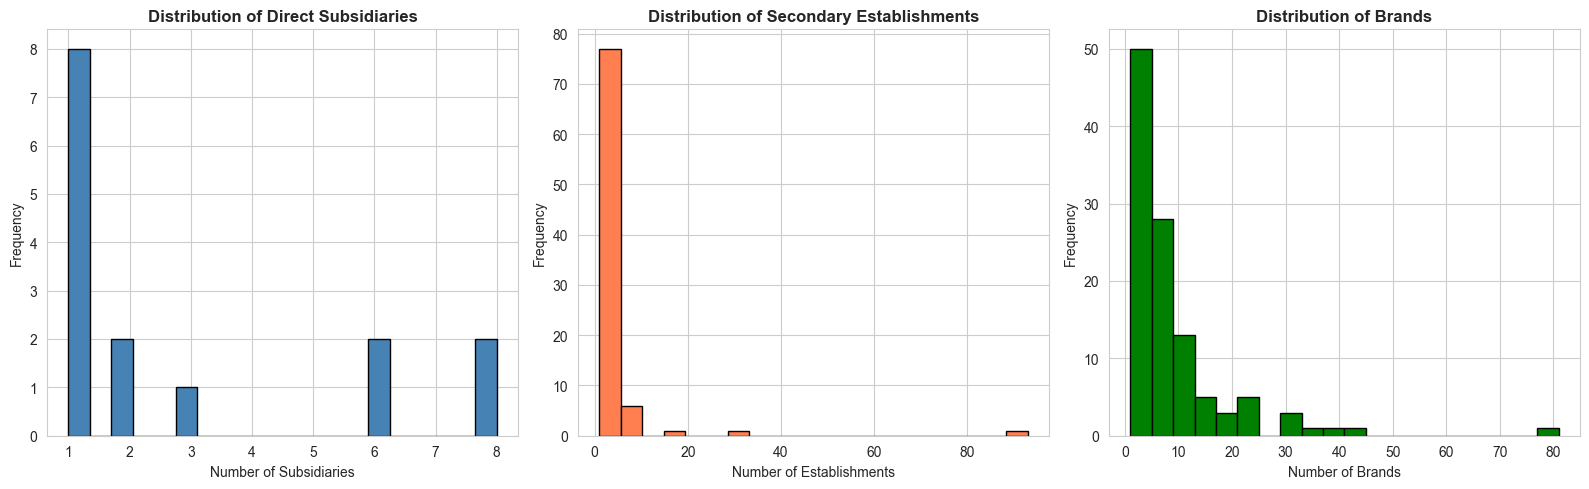

In [24]:
# Visualize company structure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Convert to numeric first (handles string values)
nb_filiales = pd.to_numeric(df_structure['nbFilialesDirectes'], errors='coerce')
nb_etab = pd.to_numeric(df_structure['nbEtabSecondaire'], errors='coerce')
nb_marques = pd.to_numeric(df_structure['nbMarques'], errors='coerce')

# Subsidiaries
subs_data = nb_filiales[nb_filiales > 0]
if len(subs_data) > 0:
    axes[0].hist(subs_data, bins=20, color='steelblue', edgecolor='black')
    axes[0].set_title('Distribution of Direct Subsidiaries', fontweight='bold')
    axes[0].set_xlabel('Number of Subsidiaries')
    axes[0].set_ylabel('Frequency')

# Secondary establishments
etab_data = nb_etab[nb_etab > 0]
if len(etab_data) > 0:
    axes[1].hist(etab_data, bins=20, color='coral', edgecolor='black')
    axes[1].set_title('Distribution of Secondary Establishments', fontweight='bold')
    axes[1].set_xlabel('Number of Establishments')
    axes[1].set_ylabel('Frequency')

# Brands
brands_data = nb_marques[nb_marques > 0]
if len(brands_data) > 0:
    axes[2].hist(brands_data, bins=20, color='green', edgecolor='black')
    axes[2].set_title('Distribution of Brands', fontweight='bold')
    axes[2].set_xlabel('Number of Brands')
    axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. Classification Flags

This dataset contains company classification and type flags:
- Startup, B2B, B2C flags
- Fintech, CAC40 flags
- Family business indicators
- Company type classifications

**Use case:** Company segmentation, filtering, classification analysis.


In [25]:
# Load classification flags from loaded datasets
df_flags = data['05_classification_flags']

print(f"Dataset shape: {df_flags.shape}")
display(df_flags.head(10))


Dataset shape: (375, 15)


,company_name,siren,siret,startup,radiee,entreprise_b2b,entreprise_b2c,fintech,cac40,entreprise_familiale,entreprise_familiale_ter,filtre_levee_fond,flag_type_entreprise,hasMarques,hasESV1Contacts
0,PROCONI,132066,NaN,False,False,False,False,False,False,False,undefined,False,['secteur_industriel'],False,False
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,False,False,True,False,False,False,True,true,False,"['entreprise_familiale', 'entreprise_b2b', 'fi...",True,True
2,JULIEN MACK,16450298,1.645030e+12,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",True,False
3,OROC BAT,46580031,4.658003e+12,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'site_ecommerce', 'activite...",True,False
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",False,False
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'site_ecommerce', 'secteur_...",False,False
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,False,False,True,False,False,False,False,false,False,"['entreprise_b2b', 'site_ecommerce', 'activite...",False,False
7,BIRABEN,96780838,9.678084e+12,False,False,True,False,False,False,True,true,False,"['entreprise_familiale', 'entreprise_b2b', 'si...",False,False
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'activite_rd', 'secteur_ind...",False,True
9,SALAISONS CHAMBADE,300700119,3.007001e+13,False,False,True,False,False,False,False,undefined,False,"['entreprise_b2b', 'secteur_industriel', 'cara...",False,False


In [26]:
# Count flags
print(f"\nFlag Counts:")
boolean_cols = ['startup', 'radiee', 'entreprise_b2b', 'entreprise_b2c', 'fintech', 'cac40',
                'entreprise_familiale', 'filtre_levee_fond', 'hasMarques', 'hasESV1Contacts', 'hasGroupOwner']
for col in boolean_cols:
    if col in df_flags.columns:
        count = df_flags[col].sum() if df_flags[col].dtype == bool else (df_flags[col] == True).sum()
        print(f"{col}: {count} companies ({count/len(df_flags)*100:.1f}%)")



Flag Counts:
startup: 0 companies (0.0%)
radiee: 0 companies (0.0%)
entreprise_b2b: 368 companies (98.1%)
entreprise_b2c: 12 companies (3.2%)
fintech: 0 companies (0.0%)
cac40: 0 companies (0.0%)
entreprise_familiale: 30 companies (8.0%)
filtre_levee_fond: 0 companies (0.0%)
hasMarques: 111 companies (29.6%)
hasESV1Contacts: 75 companies (20.0%)


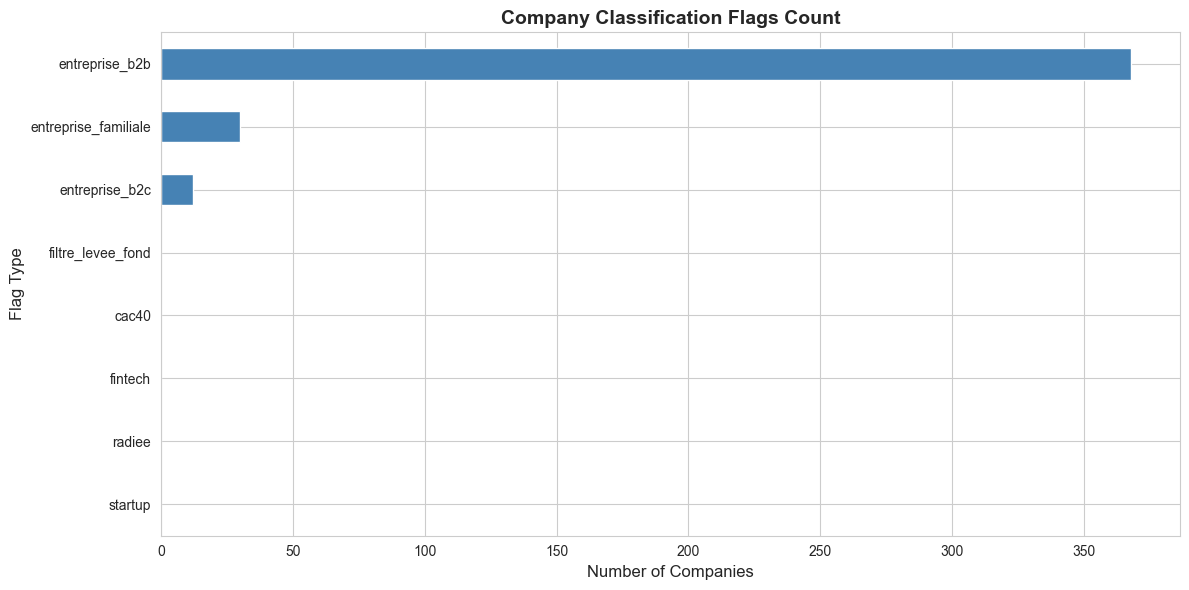

In [27]:
# Visualize classification flags
boolean_cols = ['startup', 'radiee', 'entreprise_b2b', 'entreprise_b2c', 'fintech', 'cac40',
                'entreprise_familiale', 'filtre_levee_fond']

flag_counts = {}
for col in boolean_cols:
    if col in df_flags.columns:
        count = df_flags[col].sum() if df_flags[col].dtype == bool else (df_flags[col] == True).sum()
        flag_counts[col] = count

if flag_counts:
    plt.figure(figsize=(12, 6))
    flags_df = pd.Series(flag_counts).sort_values(ascending=True)
    flags_df.plot(kind='barh', color='steelblue')
    plt.title('Company Classification Flags Count', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Companies', fontsize=12)
    plt.ylabel('Flag Type', fontsize=12)
    plt.tight_layout()
    plt.show()


## 6. Contact Metrics

This dataset contains contact information metrics:
- Number of email contacts
- Number of LinkedIn URLs
- Professional and personal contact counts
- Contact quality metrics

**Use case:** Contact availability analysis, lead generation potential, contact quality assessment.


In [28]:
# Load contact metrics from loaded datasets
df_contacts = data['06_contact_metrics']

print(f"Dataset shape: {df_contacts.shape}")
display(df_contacts.head(10))


Dataset shape: (375, 9)


,company_name,siren,siret,nombre_societeinfo_contact_email,nombre_societeinfo_contact_linkedin_url,nombre_societeinfo_contact_pro,nombre_societeinfo_contact_perso,nombre_societeinfo_contact_max2,nombre_societeinfo_contact_max5
0,PROCONI,132066,NaN,0,0,0,0,0,0
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,6,6,14,0,2,5
2,JULIEN MACK,16450298,1.645030e+12,11,11,0,16,2,5
3,OROC BAT,46580031,4.658003e+12,8,8,1,9,2,5
4,MINOTERIE DU TRIEVES CORREARD ET FILS,57504649,5.750465e+12,0,0,0,14,2,5
5,MAISON CANTINI FLANDIN,57821266,5.782127e+12,1,1,0,4,2,4
6,AUVRAY-AUXY EN GATINAIS,86781150,8.678115e+12,0,0,2,1,2,3
7,BIRABEN,96780838,9.678084e+12,0,0,0,0,0,0
8,LAITERIE DE MAYOTTE,99378564,9.937856e+12,55,55,55,0,2,5
9,SALAISONS CHAMBADE,300700119,3.007001e+13,2,2,2,5,2,5


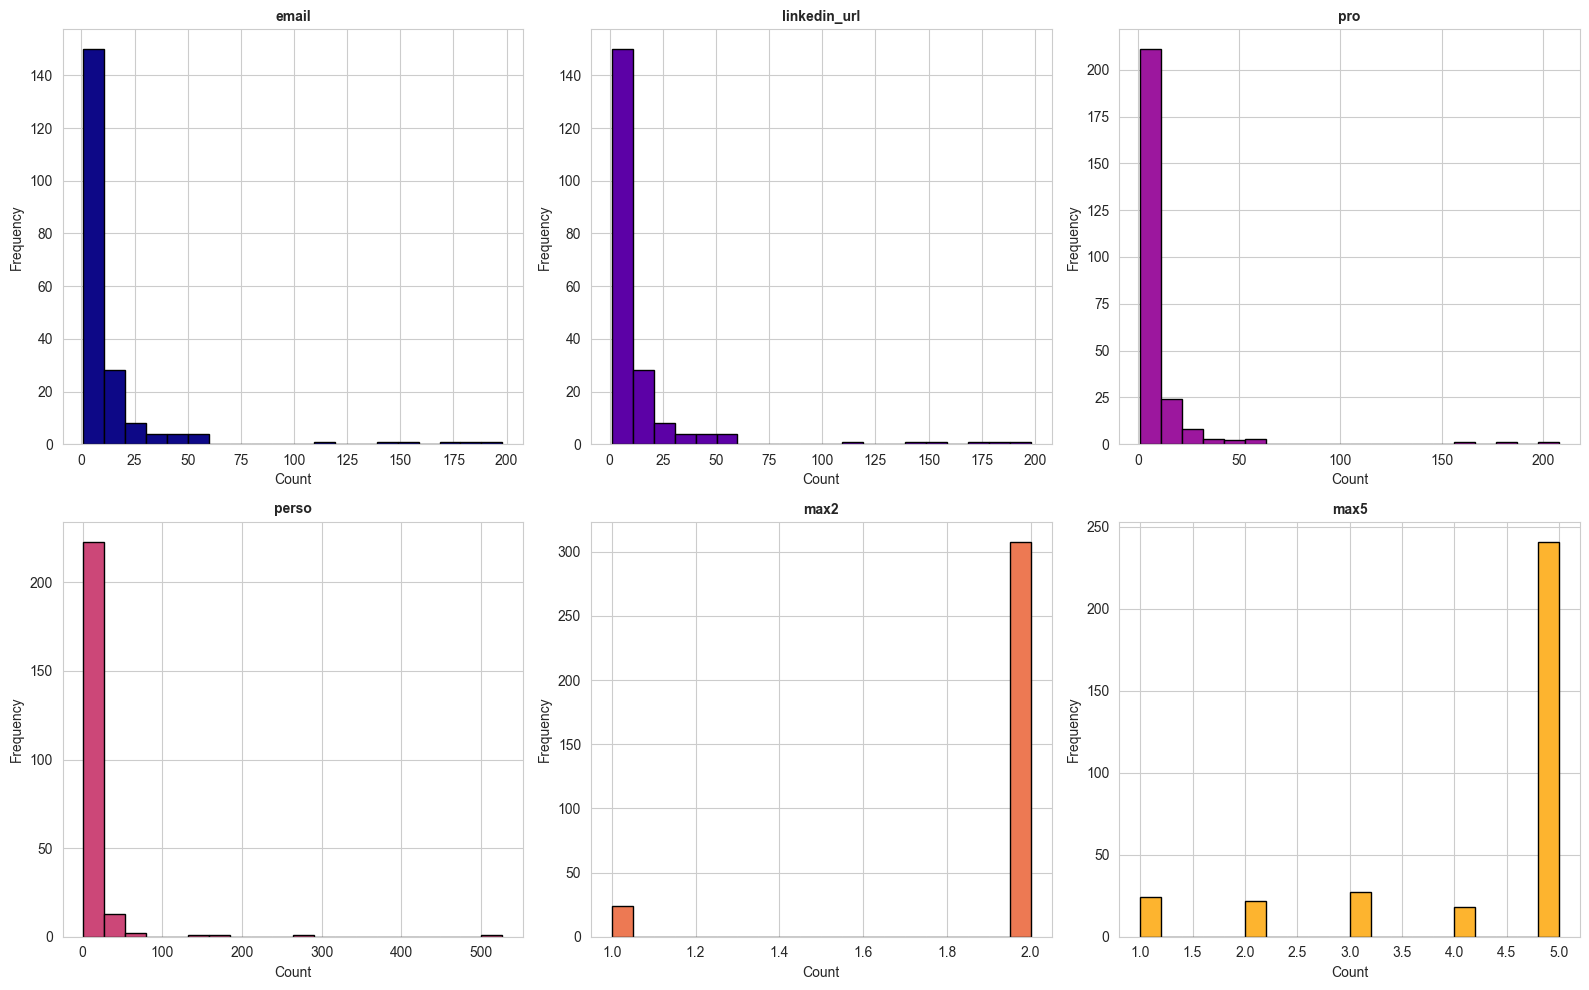

In [29]:
# Visualize contact metrics
contact_cols = [col for col in df_contacts.columns if 'contact' in col]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(contact_cols[:6]):
    data_col = df_contacts[df_contacts[col] > 0][col]
    if len(data_col) > 0:
        axes[idx].hist(data_col, bins=20, color=plt.cm.plasma(idx/len(contact_cols)), edgecolor='black')
        axes[idx].set_title(col.replace('nombre_societeinfo_contact_', ''), fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Count')
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
# Summary
print(f"\nContact Metrics Summary:\n")
# contact_cols = [col for col in df_contacts.columns if 'contact' in col]

for col in contact_cols:
    total = df_contacts[col].sum()
    companies_with_contacts = (df_contacts[col] > 0).sum()
    print(f" {col} : \n ")
    print(f"  Total contacts: {total}")
    print(f"  Companies with contacts: {companies_with_contacts} ({companies_with_contacts/len(df_contacts)*100:.1f}%)")



Contact Metrics Summary:

 nombre_societeinfo_contact_email : 
 
  Total contacts: 2713
  Companies with contacts: 204 (54.4%)
 nombre_societeinfo_contact_linkedin_url : 
 
  Total contacts: 2713
  Companies with contacts: 204 (54.4%)
 nombre_societeinfo_contact_pro : 
 
  Total contacts: 2195
  Companies with contacts: 254 (67.7%)
 nombre_societeinfo_contact_perso : 
 
  Total contacts: 3315
  Companies with contacts: 242 (64.5%)
 nombre_societeinfo_contact_max2 : 
 
  Total contacts: 640
  Companies with contacts: 332 (88.5%)
 nombre_societeinfo_contact_max5 : 
 
  Total contacts: 1426
  Companies with contacts: 332 (88.5%)


## 7. KPI Data

This dataset contains Key Performance Indicators by year (2014-2025).

**Note:** This is a long-format dataset with multiple rows per company (one per year).

**Use case:** Temporal trend analysis, year-over-year comparisons, financial performance tracking.


In [31]:
# Load KPI data from loaded datasets
df_kpi = data['07_kpi_data']

print(f"Dataset shape: {df_kpi.shape}")
print(f"\nColumns: {list(df_kpi.columns)}")
display(df_kpi.head(10))

Dataset shape: (3779, 28)

Columns: ['company_name', 'siren', 'siret', 'year', 'fonds_propres', 'ca_france', 'date_cloture_exercice', 'duree_exercice', 'salaires_traitements', 'charges_financieres', 'impots_taxes', 'ca_bilan', 'resultat_exploitation', 'dotations_amortissements', 'capital_social', 'code_confidentialite', 'resultat_bilan', 'annee', 'effectif', 'effectif_sous_traitance', 'filiales_participations', 'evolution_ca', 'subventions_investissements', 'ca_export', 'evolution_effectif', 'participation_bilan', 'ca_consolide', 'resultat_net_consolide']


,company_name,siren,siret,year,fonds_propres,ca_france,date_cloture_exercice,duree_exercice,salaires_traitements,charges_financieres,...,effectif,effectif_sous_traitance,filiales_participations,evolution_ca,subventions_investissements,ca_export,evolution_effectif,participation_bilan,ca_consolide,resultat_net_consolide
0,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2023,2192166.0,6729652.0,2023-01-31,12.0,1394492.0,80993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2022,1614077.0,6247357.0,2022-01-31,12.0,1327711.0,81469.0,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2021,1497114.0,5296275.0,2021-01-31,12.0,1318083.0,66111.0,...,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2020,1577275.0,5710890.0,2020-01-31,12.0,1380952.0,70953.0,...,45.0,18930.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2019,1348804.0,5221375.0,2019-01-31,12.0,1230571.0,88389.0,...,43.0,15835.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2018,1492199.0,NaN,2018-01-31,12.0,1372333.0,385712.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2017,1419433.0,5630041.0,2017-01-31,12.0,1394179.0,47878.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2016,NaN,NaN,2016-01-31,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2015,NaN,NaN,2015-01-31,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1.575153e+12,2025,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0772,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Summary
print(f"\nKPI Summary:")
print(f"Total records: {len(df_kpi)}")
print(f"Unique companies: {df_kpi['siren'].nunique()}")

# print(f"Years covered: {sorted(df_kpi['year'].unique())}")

print(f"\nRecords per year:")
print(df_kpi['year'].value_counts().sort_index())



KPI Summary:
Total records: 3779
Unique companies: 374

Records per year:
year
2010     15
2011     48
2012     58
2013    210
2014    242
2015    306
2016    291
2017    355
2018    282
2019    300
2020    330
2021    314
2022    342
2023    264
2024    278
2025    144
Name: count, dtype: int64


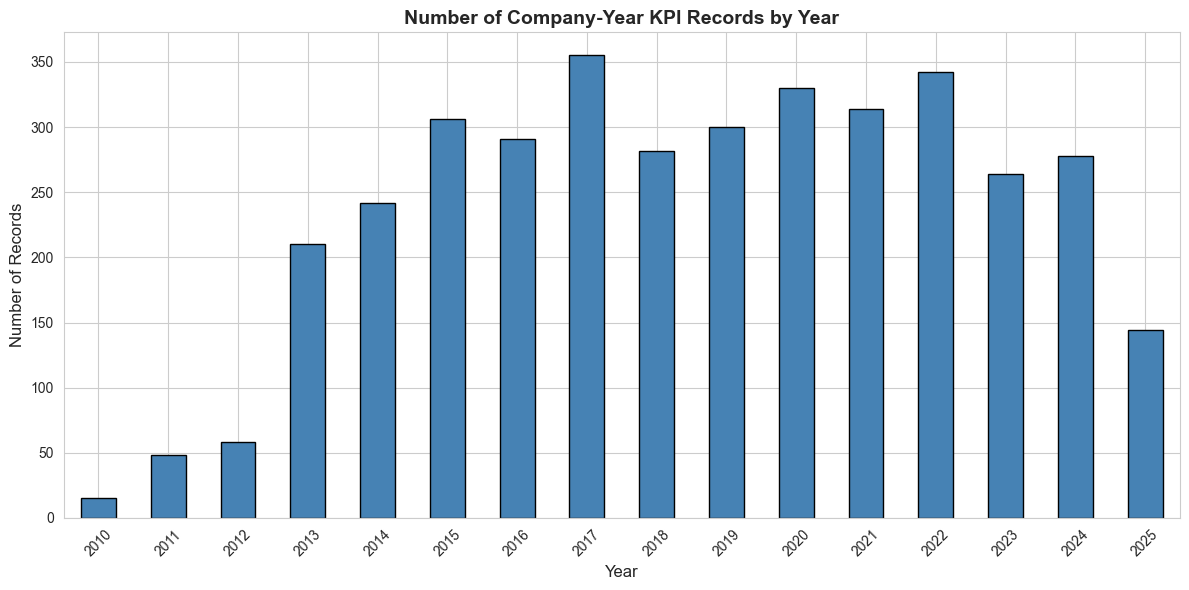

In [33]:
# Visualize KPI data over time
# Example: Show number of companies with KPI data per year
kpi_by_year = df_kpi.groupby('year').size()

plt.figure(figsize=(12, 6))
kpi_by_year.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Company-Year KPI Records by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
# Show sample KPI metrics if available
kpi_metric_cols = [col for col in df_kpi.columns if col not in ['company_name', 'siren', 'siret', 'year']]
if len(kpi_metric_cols) > 0:
    print(f"\nSample KPI metrics (showing first 5): {kpi_metric_cols[:5]}")

    # Show a sample company's KPI over time
    sample_siren = df_kpi['siren'].iloc[0] # 1st line of our dataset = PAIN D'EPICES MULOT ET PETITJEAN
    sample_company = df_kpi[df_kpi['siren'] == sample_siren].sort_values('year') # sort by year for selected compagny
    print(f"\nSample: KPI data for company {sample_siren}:")
    display(sample_company[['year'] + kpi_metric_cols[:]].head(10))



Sample KPI metrics (showing first 5): ['fonds_propres', 'ca_france', 'date_cloture_exercice', 'duree_exercice', 'salaires_traitements']

Sample: KPI data for company 15751530:


,year,fonds_propres,ca_france,date_cloture_exercice,duree_exercice,salaires_traitements,charges_financieres,impots_taxes,ca_bilan,resultat_exploitation,...,effectif,effectif_sous_traitance,filiales_participations,evolution_ca,subventions_investissements,ca_export,evolution_effectif,participation_bilan,ca_consolide,resultat_net_consolide
10,2014,NaN,NaN,2014-01-31,12.0,NaN,NaN,NaN,6653070.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,NaN,NaN,2015-01-31,12.0,NaN,NaN,NaN,4905670.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,NaN,NaN,2016-01-31,12.0,NaN,NaN,NaN,4684680.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,1419433.0,5630041.0,2017-01-31,12.0,1394179.0,47878.0,78290.0,5630040.0,32986.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,1492199.0,NaN,2018-01-31,12.0,1372333.0,385712.0,81066.0,5971010.0,-47658.0,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1348804.0,5221375.0,2019-01-31,12.0,1230571.0,88389.0,73800.0,5221380.0,-247638.0,...,43.0,15835.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1577275.0,5710890.0,2020-01-31,12.0,1380952.0,70953.0,82085.0,5710890.0,93684.0,...,45.0,18930.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1497114.0,5296275.0,2021-01-31,12.0,1318083.0,66111.0,162691.0,5296275.0,-62109.0,...,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1614077.0,6247357.0,2022-01-31,12.0,1327711.0,81469.0,133727.0,6247357.0,65908.0,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2023,2192166.0,6729652.0,2023-01-31,12.0,1394492.0,80993.0,150846.0,6729652.0,76546.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. Signals

This dataset contains company signals and events.

**Note:** Only 70.9% of companies have signals (266 out of 375). Each company can have multiple signals.

**Use case:** Event tracking, signal analysis, company activity monitoring.


In [35]:
# Load signals data from loaded datasets
df_signals = data['08_signals']

print(f"Dataset shape: {df_signals.shape}")
print(f"\nColumns: {list(df_signals.columns)}")
display(df_signals.head(10))


Dataset shape: (2133, 12)

Columns: ['company_name', 'siren', 'siret', 'continent', 'country', 'departement', 'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count', 'sirets_count']


,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1
5,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'H', 'id': 8, 'label': 'Activité inte...",2018-04-05T11:14:31+02:00,1,1
6,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,NaN,NaN,NaN,2014-05-20T00:00:00+02:00,True,"{'code': 'X', 'id': 25, 'label': 'Actualité en...",2014-05-16T10:10:24+02:00,1,1
7,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'U', 'id': 21, 'label': 'Nomination'}",2016-03-31T12:48:27+02:00,1,1
8,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,NaN,"[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2016-09-21T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2016-09-20T10:45:56+02:00,1,1
9,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'Hbis', 'id': 24, 'label': 'Activité ...",2016-03-28T19:33:31+02:00,1,1


In [36]:
# Summary
print(f"\nSignals Summary:")
print(f"Total signal records: {len(df_signals)}")
print(f"Unique companies with signals: {df_signals['siren'].nunique()}")
print(f"Average signals per company: {len(df_signals) / df_signals['siren'].nunique():.1f}")
print(f"\nSignal types:")
if 'type' in df_signals.columns:
    print(df_signals['type'].value_counts().head(10))
print(f"\nCountries:")
if 'country' in df_signals.columns:
    print(df_signals['country'].value_counts().head(10))



Signals Summary:
Total signal records: 2133
Unique companies with signals: 266
Average signals per company: 8.0

Signal types:
type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}           

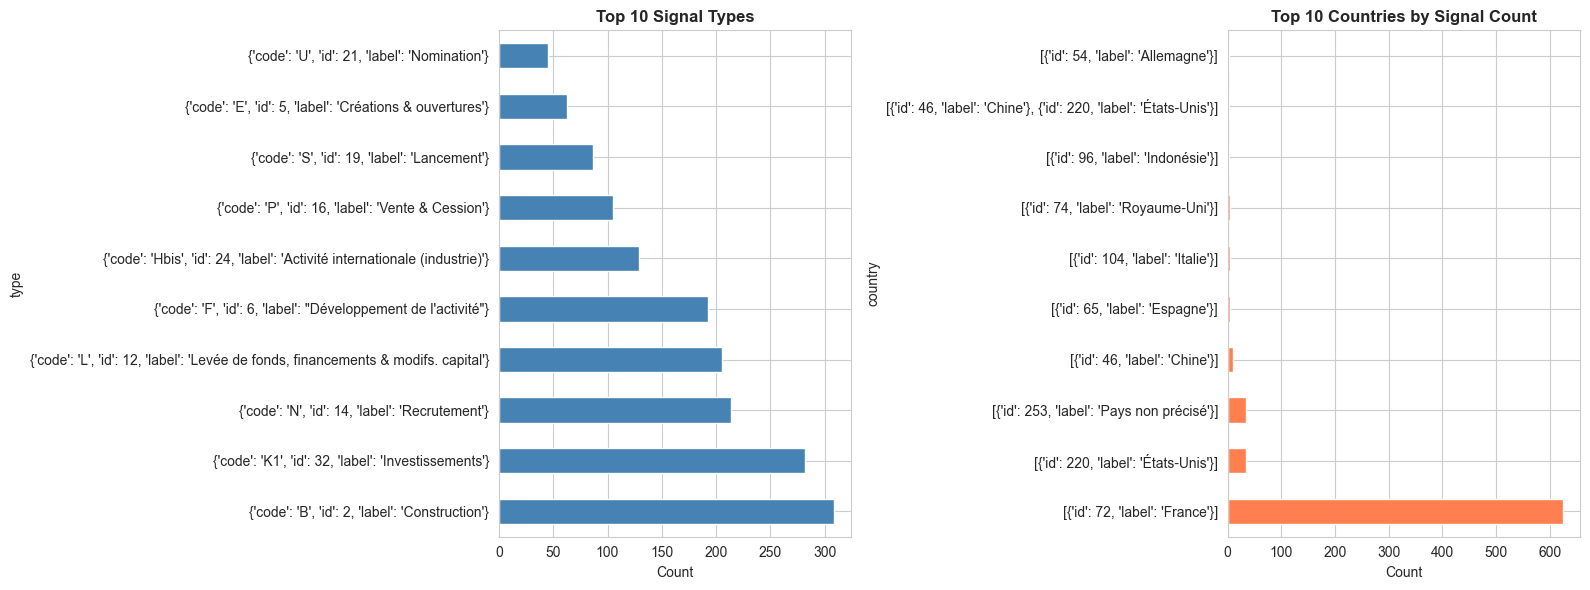

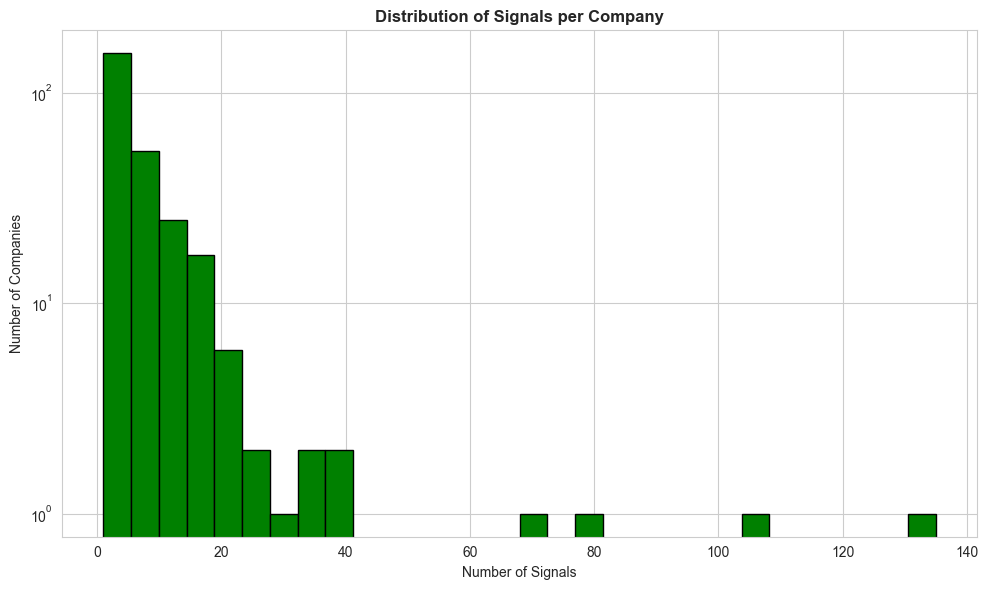

In [37]:
# Visualize signals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'type' in df_signals.columns:
    signal_types = df_signals['type'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_signals.columns:
    countries = df_signals['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Signal Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Signals per company distribution
signals_per_company = df_signals.groupby('siren').size()
plt.figure(figsize=(10, 6))
signals_per_company.hist(bins=30, color='green', edgecolor='black')
plt.title('Distribution of Signals per Company', fontweight='bold')
plt.xlabel('Number of Signals')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()


## 9. Articles

This dataset contains articles and news related to companies.

**Note:** Only 70.9% of companies have articles (266 out of 375). Each company can have multiple articles.

**Use case:** News analysis, media coverage tracking, company visibility assessment.


In [38]:
# Load articles data from loaded datasets
df_articles = data['09_articles']

print(f"Dataset shape: {df_articles.shape}")
print(f"\nColumns: {list(df_articles.columns)}")
display(df_articles.head(10))


Dataset shape: (1180, 13)

Columns: ['company_name', 'siren', 'siret', 'title', 'publishedAt', 'author', 'signalsStatus', 'signalsType', 'country', 'sectors', 'cities', 'sources', 'all_companies_count']


,company_name,siren,siret,title,publishedAt,author,signalsStatus,signalsType,country,sectors,cities,sources,all_companies_count
0,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et Petitjean va injecter 1M€ dans la rén...,2019-12-31T00:00:00+01:00,"{'initial': 'M.L', 'name': 'Mathieu Lallement'...",[{'label': 'Détecté'}],[{'label': 'Investissements'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Rémy DISSOUBRAY', 'datePub': '19/1...",1
1,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Les produits bourguignons à la conquête de la ...,2014-05-20T00:00:00+02:00,"{'initial': 'S.R', 'name': 'Soizic RIGAL', 'id...","[{'label': 'Détecté'}, {'label': 'Détecté'}]","[{'label': 'Actualité entreprise'}, {'label': ...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Adrien Cahuzac', 'datePub': '15/05...",5
2,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et Petitjean investit 6 M€ et prévoit de...,2016-04-12T00:00:00+02:00,NaN,"[{'label': 'Détecté'}, {'label': 'Détecté'}, {...","[{'label': 'Construction'}, {'label': 'Investi...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'Magali Fichter', 'datePub': '08/04...",1
3,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et PetitJean à la conquête de la scène i...,2014-03-26T00:00:00+01:00,"{'initial': 'M.N', 'name': 'Maxime Negrier', '...","[{'label': 'Détecté'}, {'label': 'Détecté'}, {...",[{'label': 'Activité internationale (tertiaire...,"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'datePub': '05/03/2014', 'urlWeb': 'http://ww...",1
4,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et Petitjean précise ses projets d'inves...,2021-10-06T00:00:00+02:00,"{'initial': 'B.P', 'name': 'Bastien Pechereau'...",[{'label': 'Suivi'}],[{'label': 'Investissements'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'author': 'C.P.', 'datePub': '28/09/2021', 'u...",1
5,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et Petitjean affiche ses ambitions à l'e...,2016-04-01T00:00:00+02:00,"{'initial': 'R.L', 'name': 'Romain Landry', 'i...",[{'label': 'Détecté'}],[{'label': 'Activité internationale (industrie...,"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'datePub': 'n°264', 'urlWeb': 'http://www.man...",1
6,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Pains d’épices Mulot et Petitjean investit,2020-09-08T00:00:00+02:00,"{'initial': 'C.M', 'name': 'Camille Monier', '...","[{'label': 'Détecté'}, {'label': 'Suivi'}]","[{'label': 'Levée de fonds, financements & mod...","{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'urlWeb': 'https://www.decidento.com/', 'id':...",1
7,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Alliance 7,2016-04-01T00:00:00+02:00,"{'initial': 'S.R', 'name': 'Soizic RIGAL', 'id...",[{'label': 'Détecté'}],[{'label': 'Nomination'}],"{'id': 72, 'label': 'France'}","{'logo': 'Administration180.png', 'industry': ...","{'zipCode': '75008', 'code': '75108', 'latitud...",NaN,2
8,PAIN D'EPICES MULOT ET PETITJEAN,15751530,1575153000013,Mulot et Petitjean veut s'agrandir,2015-10-21T00:00:00+02:00,"{'initial': 'R.L', 'name': 'Romain Landry', 'i...",[{'label': 'Détecté'}],[{'label': 'Construction'}],"{'id': 72, 'label': 'France'}","{'logo': 'Agroalimentaire180.png', 'industry':...","{'zipCode': '21000', 'code': '21231', 'latitud...","{'datePub': 'Octo

In [39]:
# Summary
print(f"\nArticles Summary:")
print(f"Total article records: {len(df_articles)}")
print(f"Unique companies with articles: {df_articles['siren'].nunique()}")
print(f"Average articles per company: {len(df_articles) / df_articles['siren'].nunique():.1f}")
print(f"\nSignal status:")
if 'signalsStatus' in df_articles.columns:
    print(df_articles['signalsStatus'].value_counts())
print(f"\nSignal types:")
if 'signalsType' in df_articles.columns:
    print(df_articles['signalsType'].value_counts().head(10))



Articles Summary:
Total article records: 1180
Unique companies with articles: 266
Average articles per company: 4.4

Signal status:
signalsStatus
[{'label': 'Détecté'}]                                                                                            379
[{'label': 'Détecté'}, {'label': 'Détecté'}]                                                                      222
[{'label': 'Détecté'}, {'label': 'Détecté'}, {'label': 'Détecté'}]                                                119
[{'label': 'Suivi'}]                                                                                               83
[{'label': 'Suivi'}, {'label': 'Détecté'}]                                                                         45
                                                                                                                 ... 
[{'label': 'Détecté'}, {'label': 'Suivi'}, {'label': 'Détecté'}, {'label': 'Détecté'}, {'label': 'Détecté'}]        1
[{'label': 'Terminé'}, {'la

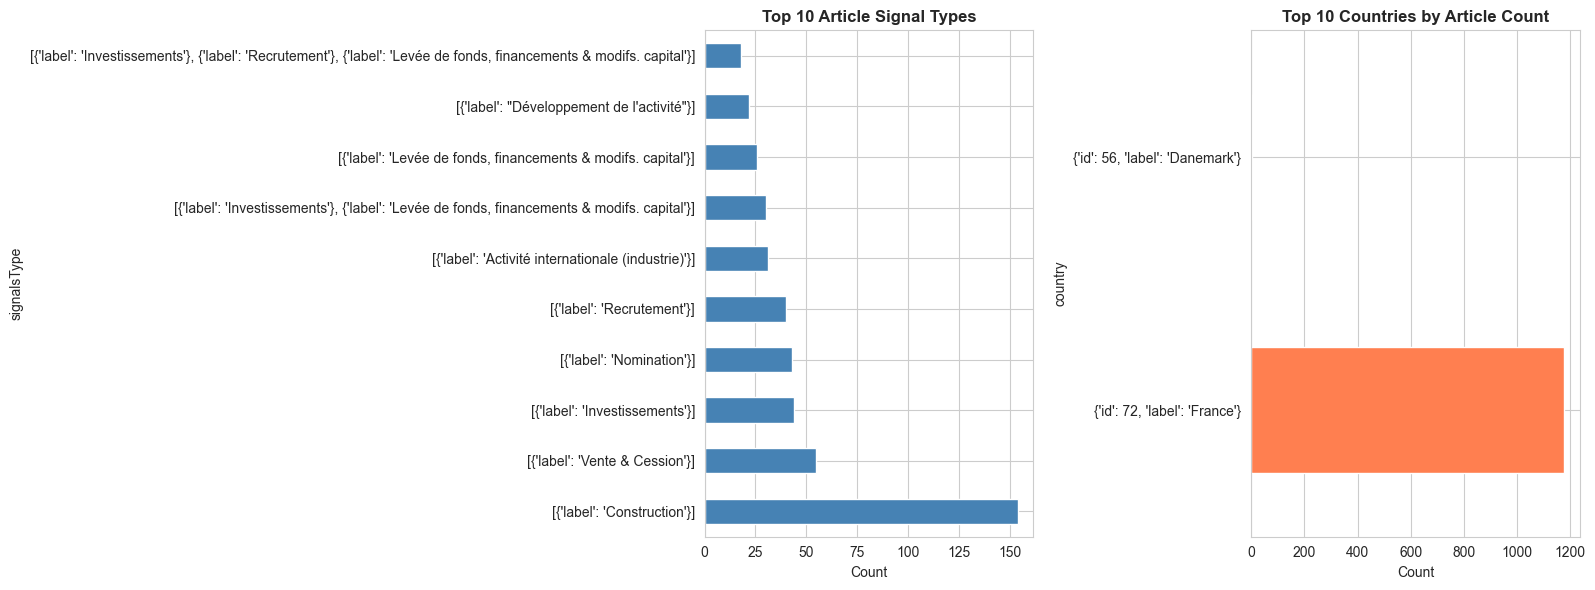

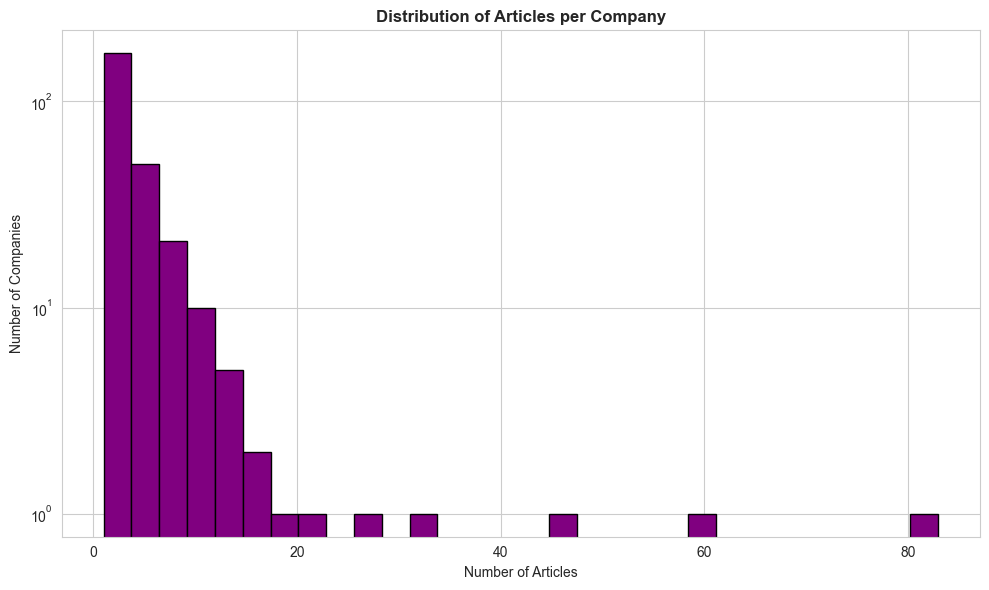

In [40]:
# Visualize articles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'signalsType' in df_articles.columns:
    signal_types = df_articles['signalsType'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Article Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_articles.columns:
    countries = df_articles['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Article Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Articles per company distribution
articles_per_company = df_articles.groupby('siren').size()
plt.figure(figsize=(10, 6))
articles_per_company.hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Articles per Company', fontweight='bold')
plt.xlabel('Number of Articles')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()
